## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="img.png" height="300" width="300" align='center'>

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?


In [152]:
# Import necessary libs:

# 1. import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.patches

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import math
import numpy as np


In [153]:
# Create the dataset using the np.array() with the data provided above
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])
# Store the number of users for further usages.
# Store the number of movies for further usages.
users_num, movies_num = X.shape

print(users_num, movies_num)


7 5


                            The Origial Dataset 


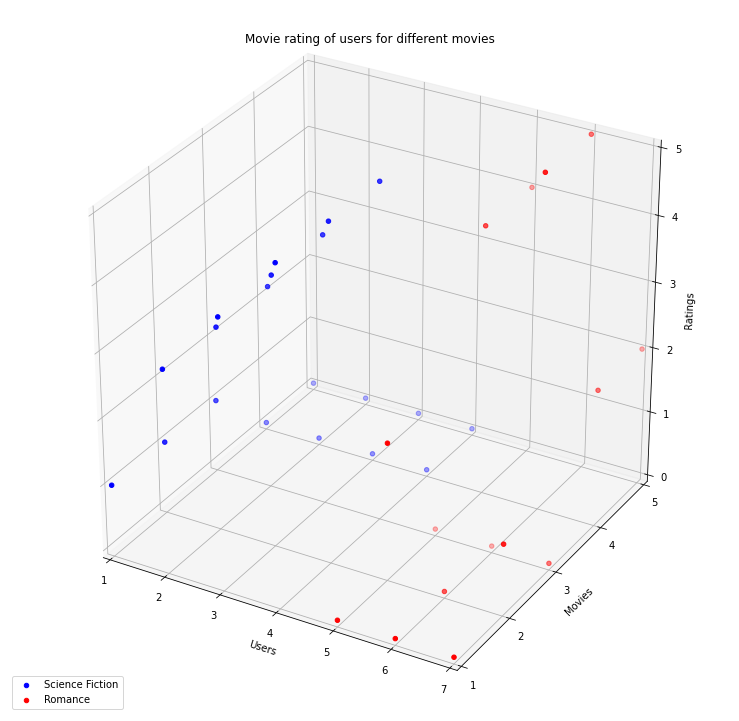

In [154]:
# Plot the data set:

# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.
# tips: use np.array() and flatten() function.
users, movies, reviews = np.array([i+1 for i in range(users_num)]), np.array([i+1 for i in range(movies_num)]), X.flatten()
def plot_data_set(users, movies, reviews, movies_num):
    # 2. Set the figure size to (13,13) by using the function plt.figure().
    fig = plt.figure(figsize=(13, 13))
    # 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
    #    set the first positional arguments to 111 and projection to 3d.
    ax = fig.add_subplot(111, projection='3d')
    for idx, user in enumerate(users):
      # if index less than 4 - Sci Fic
        if idx < 4:  
            marker = 'o'
            label = 'Science Fiction'
            color = 'blue'
      # else Romance
        else:       
            marker = 'o'
            label = 'Romance'
            color = 'red'
        
        users_l = [user for _ in range(movies_num)]
        movies_l = [movie for movie in movies]
        ratings_l = [rating for rating in reviews[idx*movies_num:idx*movies_num + movies_num]]
        ax.scatter(xs=users_l,ys = movies_l,zs=ratings_l,marker=marker,color=color,label= label if idx==0 or idx==4 else "")
            
    # 4. Set the font size of the legend to be 10 by using plt.rcParams with 'legend.fontsize' as the key.
    # 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
    #     moreover, set resonalbe color and label legend.

    # 6. Plot the dataset using plot() for the Romance follow the pervious instruction.

    # 7. Set the legend to a proper position using ax.legend(loc=?)

    # 8. Set label for the x and y axis with proper front size using plt.xlabel(...)

    # 9. Set the title of this fig using plt.title()

    ax.legend(fontsize=10, loc='lower left')
    ax.set_title('Movie rating of users for different movies\n')
    ax.set_xlabel('Users')
    ax.set_ylabel('Movies')
    ax.set_zlabel('Ratings')

    rmax, rmin = math.ceil(reviews.max()), math.floor(reviews.min())
    ax.set_xlim([users.min(), users.max()])
    ax.set_ylim([movies.min(), movies.max()])
    ax.set_zlim([rmin, rmax])
    # 10. Set the ticks for x axis and y aixs by using plt.xticks()/yticks()
    ax.set_xticks(users)
    ax.set_yticks(movies)
    ax.set_zticks([i for i in range(rmin, rmax+1)])
    # 11. plot and present the fig using plt.show()
    plt.show(fig)
print("                           \033[1m The Origial Dataset \033[0m")
plot_data_set(users,movies,reviews,movies_num)








In [155]:
# Data Preprocessing:

# 1. Calculate the mean of the data set
X_mean = X.mean(axis=0)
# 2. Subtract the mean from the data set
# 3. Store the new centered data set

X_new_centered = X - X_mean


                            The Dataset Centered at 0 


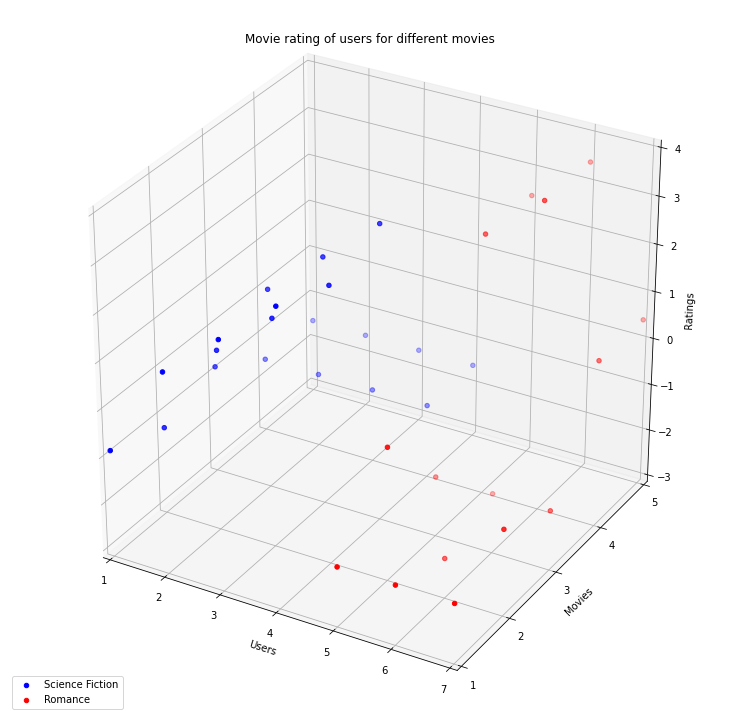

In [156]:
users, movies, reviews = np.array([i+1 for i in range(users_num)]), np.array([i+1 for i in range(movies_num)]), X_new_centered.flatten()
print("                           \033[1m The Dataset Centered at 0 \033[0m")

plot_data_set(users, movies, reviews, movies_num)

## Solution1: Implementing PCA using Singular Value Decomposition (SVD)

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.


In [157]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
# 2. np.linalg.svd()
# 3. Store the u,s,v^T values
U, S, vT = np.linalg.svd(X_new_centered)

In [158]:
print("U.shape, S.shape, V.T.shape ->", U.shape, S.shape, vT.shape, end="\n\n")

print("U =", np.around(U, decimals=3), sep="\n", end="\n\n")

print("S =", np.around(S, decimals=3), sep="\n", end="\n\n")

print("V.T =", np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.014 -0.691 -0.158 -0.696  0.08   0.049 -0.065]
 [ 0.265 -0.142 -0.077  0.246  0.014  0.9   -0.18 ]
 [ 0.39   0.133 -0.036 -0.234 -0.846  0.029  0.24 ]
 [ 0.516  0.408  0.004 -0.368  0.519  0.084  0.395]
 [-0.388  0.286  0.686 -0.421 -0.079  0.304 -0.148]
 [-0.546  0.347 -0.662 -0.21  -0.051  0.253  0.179]
 [-0.25  -0.34   0.244  0.211  0.004  0.15   0.834]]

S =
[10.492  4.09   1.324  0.     0.   ]

V.T =
[[ 0.471  0.374  0.471 -0.456 -0.456]
 [ 0.356  0.412  0.356  0.537  0.537]
 [-0.389  0.831 -0.389 -0.061 -0.061]
 [ 0.707 -0.    -0.707 -0.    -0.   ]
 [-0.    -0.     0.     0.707 -0.707]]



[1.04924990e+01 4.08968554e+00 1.32414745e+00 4.99318451e-16
 4.31077053e-32]
[0, 1, 2, 3, 4, 5]


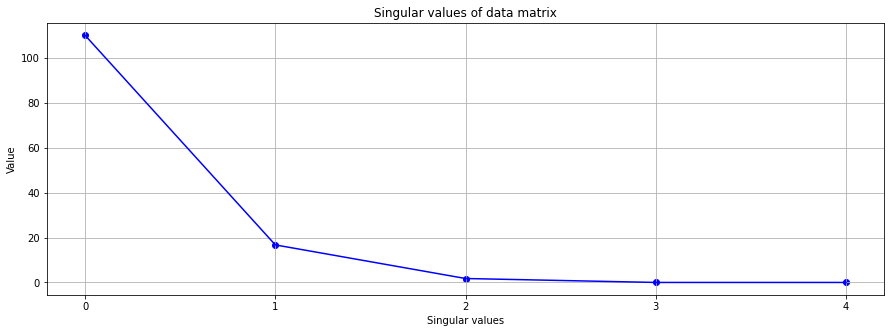

In [159]:
# plot the singlar values for the  D  matrix.
# 1. Calculate the D matrix using s: D is s*s
# D_matrix = np.diag(S)
D_matrix = S*S 
# 2. Set the fig size to (15,5)
# 3. Add the line chart using plt.plot( ?? ,'bo-')
# 3. Add proper tital, ticks, axis label
def plot_array(x_arr,y_arr,title,xlabel,ylabel,xticks,figsize=(15,5),ptype='scatter'):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # ptype=ptype
    if xticks:
        ax.set_xticks(xticks)
    ax.grid(True)

    if ptype == 'scatter':
        # for x in x_arr:
        for idx,x in enumerate(x_arr):

            
        

        #   # if index less than 4 - Sci Fic

            if x < 0:  
        #         print("hello")

                # marker = 'o'
                color = 'red'
                red = ax.scatter(x=x, y=y_arr[idx],marker=marker,color=color)

        #   # else Romance
            else:       
        #         # marker = 'o'
                color = 'blue'
                blue = ax.scatter(x=x, y=y_arr[idx],marker=marker,color=color,)

        ax.legend((red,blue),
          ('Class1: Users that prefers Sci-fic','Class1: Users that prefer Romance'),
          scatterpoints=1,
          loc='lower left',
          ncol=1,
          fontsize=10)

    elif ptype == 'line':
        ax.plot(y_arr,color='blue')
        
        ax.scatter(x=list(range(len(y_arr))), y=y_arr,color='blue')
  
    plt.show(fig)
    
x_arr = [i for i in range(len(S)+1)]
xticks=x_arr
y_arr = S
print(y_arr)
print(xticks)



plot_array(x_arr, D_matrix,"Singular values of data matrix",'Singular values','Value',xticks,(15,5),'line',)




In [160]:
# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above
# 2. Obtain the first k of v^T and store it
# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T
# 4. Print the compressed value of X
k = 2
wd_matrix = vT.T[:, :k]
X_compressed = np.matmul(X_new_centered, wd_matrix)

Let's visualize what just happened.

[ 0.14417203  2.7775391   4.09422264  5.41090617 -4.07253971 -5.73177463
 -2.6225256 ]
[-2.82787396 -0.57977689  0.54427165  1.66832018  1.16872711  1.41792961
 -1.3915977 ]


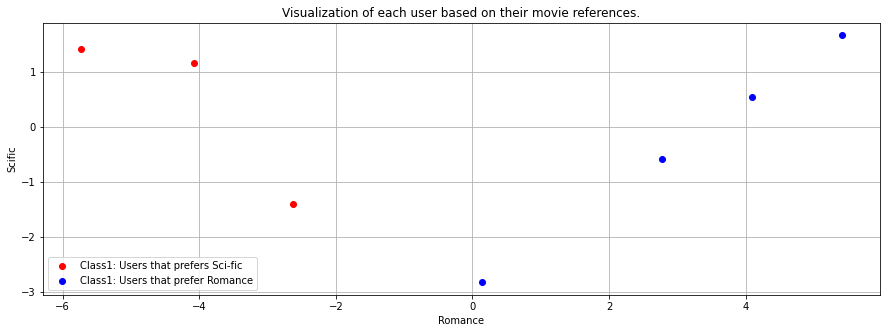

In [161]:
# Visualize what just happened:
# 1. Set the fig size to (15,5)
# 2. Create propor title, axis and legend
# 3. Plot the data

x_arr = X_compressed[:, 0]
y_arr = X_compressed[:, 1]

print(x_arr)
print(y_arr)

plot_array(x_arr, y_arr, "Visualization of each user based on their movie references.", "Romance", "Scific",xticks=None,figsize=(15,5), ptype='scatter')


## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [162]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.
# 2. Apply np.linalg.eig() to clculate the eigen vectors and values
XTX = np.matmul(X_new_centered.T, X_new_centered)
eigval, eigvec = np.linalg.eig(XTX)

In [163]:
print("V (Eigen-vectors) = ")
print(np.around(eigvec, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(eigval, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(eigval)), decimals=3))

V (Eigen-vectors) = 
[[-0.471 -0.356  0.389 -0.706  0.017]
 [-0.374 -0.412 -0.831 -0.     0.   ]
 [-0.471 -0.356  0.389  0.706 -0.017]
 [ 0.456 -0.537  0.061  0.03  -0.707]
 [ 0.456 -0.537  0.061 -0.03   0.707]]

diagonal elements of D (Eigen-values) = 
[110.093  16.726   1.753   0.      0.   ]

sqrt(Eigen-values) = 
[10.492  4.09   1.324  0.     0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [164]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people

In [165]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70
#     detail of min_faces_per_person please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
lfw_people = fetch_lfw_people(min_faces_per_person=70)
# 2. Store the number of images and its hight, width using lfw_people.images.shape

images_num, height, width = lfw_people.images.shape

print("Number of images: ",images_num)
# 3. Calculate number of pixels

pixels_num = height * width * images_num
# 4. Store the pixel values using lfw_people.data

pixel_values = lfw_people.data

print(
    f"Image data tensor shape is {lfw_people.images.shape}. Total number of pixels is {pixels_num}")


Number of images:  1288
Image data tensor shape is (1288, 62, 47). Total number of pixels is 3753232


In [166]:
def plt_face(x,h,w):
    # global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    # plt.yticks([])

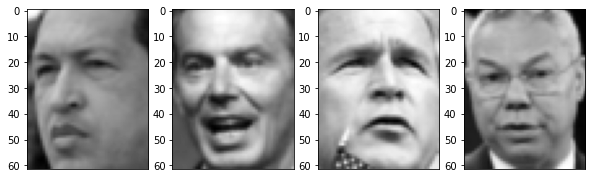

In [167]:

# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)
# 2. Use plt_face()
# 3. plt.show()
def show_faces(X, height, width, images_num=4):
    # print(height)
    fig = plt.figure()
    for i in range(1, images_num+1):
        fig.add_subplot(4, images_num, i)
        plt_face(X[i-1],height,width)
        plt.rcParams["figure.figsize"] = (10,20)
    plt.show()

show_faces(pixel_values, height, width)

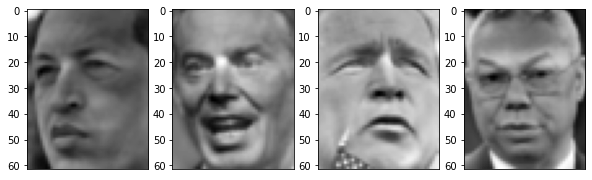

In [168]:
# Find the Mean picture:
# 1. Calculate the mean of the image data
# 2. Remove the mean from all the image
# 3. plot the face use plt_face()

mean_of_image_data = pixel_values.mean(axis=0)
mean_removed_from_all_data = pixel_values - mean_of_image_data

show_faces(mean_removed_from_all_data, height, width)


In [169]:
# Find eig vec and eig value:
# 1. Calculate the covariance metric of the zero_mean data
# 2. Use the np.linalg.eig() to compute eig value and eig vectors
# 3. Find the top5 features
# 4. Calculate the new value based on the top5 feature.
# 5. Store the new value.
XTX = np.matmul(mean_removed_from_all_data.T, mean_removed_from_all_data)
eigval, eigvec = np.linalg.eig(XTX)
top5 = eigvec[:, :5]
# X_feat_centered_compressed = np.matmul(mean_removed_from_all_data, wd_matrix)
new_value = np.matmul(mean_removed_from_all_data, top5)
# print(new_value)


In [170]:
print("Top 5 Vector:")
print()
print(eigvec[:5].real.tolist())
print()
print("Top 5 EigVal:")
print()
print(eigval[:5].real)
print()
print("Associateed 5 attributes in fourth image")
print("Indexing by",top5)
print()
print(mean_removed_from_all_data[3][:5])



Top 5 Vector:

[[0.005373429972678423, 0.017459914088249207, 0.017839690670371056, 0.033519238233566284, -0.013145295903086662, -0.005930399522185326, -0.020768096670508385, -0.00959715060889721, -0.041845034807920456, -0.0013546166010200977, -0.01823604665696621, -0.0741138756275177, 0.02967776544392109, -0.014984200708568096, -0.03056790493428707, 0.0035521560348570347, 0.048225801438093185, -0.005768108181655407, 0.028445105999708176, -0.009127065539360046, 0.038044534623622894, 0.004446584731340408, 0.0037424552720040083, 0.030446548014879227, -0.0458577424287796, 0.010397429578006268, 0.016195908188819885, -0.010071826167404652, 0.01446523703634739, -0.035229865461587906, 0.0014308105455711484, 0.004759348928928375, 0.029212992638349533, -0.021026691421866417, -0.02271372824907303, -0.009827434085309505, -0.03831753507256508, -0.006456056144088507, -0.025500552728772163, 0.004771859385073185, -0.03782010078430176, -0.009174952283501625, 0.02142033353447914, -0.0298335961997509, 0.

In [171]:
print("Top 5 EigVal:")
print()
print(eigval.real)

Top 5 EigVal:

[9.89327552e+08 7.91893632e+08 3.82945088e+08 ... 1.16450265e-01
 1.02126352e-01 2.59543061e-01]


In [172]:
# prjection of fourth face to first 5 principle components

In [173]:
'''
print("The proejction of fourth image")
print(??)
'''
print("The projection of fourth image")
print(new_value[3])

The projection of fourth image
[-202.54214  -261.47705  -418.974      29.398903  -39.78528 ]


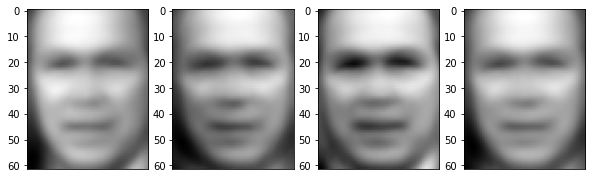

In [174]:
# project back to the image space where d=5
# X’= X_pca * VT  + X_mean 

X_prime = np.matmul(new_value,eigvec[:, :5].T) + mean_of_image_data

show_faces(X_prime, height, width)

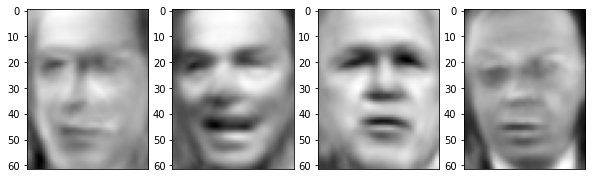

In [175]:
# project back to images where d=50
# 1. Find top 50 eig vec and eig val
# 2. Store the top 50 eig vec
# 3. Store the top 50 eig val
# 4. compute the newfeature using top50 eig vec and eig val.
# 5. plot the feace
top50 = eigvec[:, :50]
new_value = np.matmul(mean_removed_from_all_data, top50)
X_prime = np.matmul(new_value,eigvec[:, :50].T) + mean_of_image_data
show_faces(X_prime, height, width)